<a href="https://colab.research.google.com/github/saranga0427/DataScience-Projects/blob/Learning-DS/Titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic Survival Predictions

##Loading dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#tianic dataset
import pandas as pd

In [ ]:
data= pd.read_csv("drive/My Drive/Projects DS/titanic_train.csv")

In [ ]:
#Shape of data
data.shape

(891, 12)

##1. Data Exploration and Cleaning

##1.1 Checking for duplicated data

In [ ]:
#checking for duplicate rows
data.duplicated().sum()

0

In [ ]:
data.shape

(891, 12)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(891, 12)

In [ ]:
data.duplicated().sum()

0

### 1.2 Checking for irrelevant features in data


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Note: Name, Ticket and PassengerId features are not relevant to our model. So we will have to drop that. Pclass and Fare seem to be related. Seem to be missing values in cabin

In [ ]:
#dropping Time feature
data.shape

(891, 12)

In [ ]:
drop_cols = ['Name', 'PassengerId', 'Ticket']

In [ ]:
data.drop(drop_cols, axis=1, inplace=True)

In [ ]:
data.shape

(891, 9)

### 1.3 Checking for missing values in data


In [ ]:
#Lets check for missing values
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Note: There seem to be too many missing values in Cabin, we will not be able to use the feature. Dropiing Cabin. Age and Embarked has missing values, let's handle that. Conclusion- 
1. Drop- Cabin
2. Fillna- Age missing values
3. FillnaEmbarked missing values

In [ ]:
data.drop('Cabin', axis=1, inplace=True)

In [ ]:
#filling age with median values
data.Age= data.Age.fillna(data.Age.median())
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
import numpy as np
data.Embarked = data.Embarked.replace(np.nan, 'S')
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

All missing values have been added. 

### 1.4 Checking for categorical features in data for encoding


In [ ]:
#checking for dtypes and checking for categorical/object type dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


Note: We have Sex and Embarked as categorical types. We will have to do encoding. Since there is no order to the categories, we will use Onehotencoding to deal with two columns. Conclusion-
1. Sex- Onehotencoding
2. Embarked- Onehotencoding

### 1.5 Checking for scaling in data


In [ ]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#checking ranges of different features
import seaborn as sns

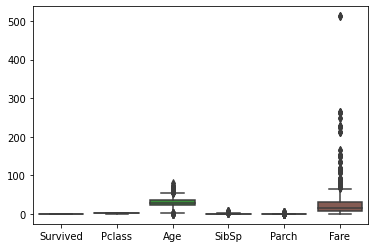

In [ ]:
sns.boxplot(data=data)

Note: The features V1 to V28 and Amount are of different scale so we will need preprocessing for scalling. Conclusion- 
1. Scaling for all features

### 1.6 Checking for imbalance in data


In [ ]:
#Class is out target. Lets check the unique values 
data['Survived'].unique()

array([0, 1])

In [ ]:
#Distribution for values in class
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Note: Data is not that imbalanced so no rebalancing. 

##2. Data Preprocessing

###2.1 Splitting the dataset into X and y

In [ ]:
y= data['Survived']
X=data.drop('Survived', axis=1)

In [ ]:
X.shape

(891, 7)

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [ ]:
y.shape

(891,)

###2.2 Splitting the data into Train and Test sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 1)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(712, 7) (179, 7)
(712,) (179,)


###2.3 OneHotEncoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
OHE= OneHotEncoder(sparse = False)

In [ ]:
#can't directly replace in df as number of columns are different for onehotencoding
#hence getting columns 
OHE_cols = OHE.fit_transform(X_train[['Sex', 'Embarked']])

In [ ]:
OHE_cols

array([[0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [ ]:
#converting to df
OHE_cols = pd.DataFrame(OHE_cols, columns= ['s1', 's2', 'e1', 'e2', 'e3'])
OHE_cols.head()

,s1,s2,e1,e2,e3
0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


We need to concatinate the above columns to the dataframe, however the have to reset the indices first as the concatination happens by indices. 

In [ ]:
#As we can see the indices are different here
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
301,3,male,28.0,2,0,23.2500,Q
309,1,female,30.0,0,0,56.9292,C
516,2,female,34.0,0,0,10.5000,S
120,2,male,21.0,2,0,73.5000,S
570,2,male,62.0,0,0,10.5000,S


In [ ]:
#Resetting indices
X_train.reset_index(drop=True, inplace=True)
OHE_cols.reset_index(drop=True, inplace=True)

In [ ]:
#Concatinate
X_train = pd.concat([X_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], OHE_cols], axis=1)

In [ ]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,s1,s2,e1,e2,e3
0,3,28.0,2,0,23.2500,0.0,1.0,0.0,1.0,0.0
1,1,30.0,0,0,56.9292,1.0,0.0,1.0,0.0,0.0
2,2,34.0,0,0,10.5000,1.0,0.0,0.0,0.0,1.0
3,2,21.0,2,0,73.5000,0.0,1.0,0.0,0.0,1.0
4,2,62.0,0,0,10.5000,0.0,1.0,0.0,0.0,1.0


Doing the same for test set

In [ ]:
#can't directly replace in df as number of columns are different for onehotencoding
#hence getting columns 
OHE_cols_test = OHE.fit_transform(X_test[['Sex', 'Embarked']])

In [ ]:
#converting to df
OHE_cols_test = pd.DataFrame(OHE_cols_test, columns= ['s1', 's2', 'e1', 'e2', 'e3'])
OHE_cols_test.head()

,s1,s2,e1,e2,e3
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0


In [ ]:
#As we can see the indices are different here
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
862,1,female,48.0,0,0,25.9292,S
223,3,male,28.0,0,0,7.8958,S
84,2,female,17.0,0,0,10.5000,S
680,3,female,28.0,0,0,8.1375,Q
535,2,female,7.0,0,2,26.2500,S


In [ ]:
#Resetting indices
X_test.reset_index(drop=True, inplace=True)
OHE_cols_test.reset_index(drop=True, inplace=True)

In [ ]:
#Concatinate
X_test = pd.concat([X_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], OHE_cols_test], axis=1)

In [ ]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,s1,s2,e1,e2,e3
0,1,48.0,0,0,25.9292,1.0,0.0,0.0,0.0,1.0
1,3,28.0,0,0,7.8958,0.0,1.0,0.0,0.0,1.0
2,2,17.0,0,0,10.5000,1.0,0.0,0.0,0.0,1.0
3,3,28.0,0,0,8.1375,1.0,0.0,0.0,1.0,0.0
4,2,7.0,0,2,26.2500,1.0,0.0,0.0,0.0,1.0


###2.3 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
SS= StandardScaler()

In [ ]:
X_train =SS.fit_transform(X_train)

In [ ]:
#no fit on test as we are not using this set for learning
X_test =SS.transform(X_test)

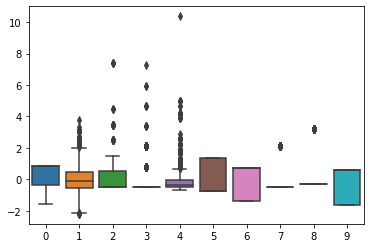

In [ ]:
#visualize the spread  
sns.boxplot(data=X_train)

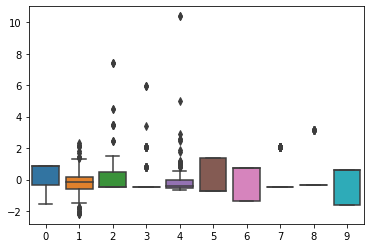

In [ ]:
sns.boxplot(data=X_test)

Note: The features have been scaled

##3. Model without balancing

In [ ]:
#importing all classification models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
#importing metrics- f1score and confusion matrix
from sklearn.metrics import f1_score, plot_confusion_matrix

In [ ]:
#creating objects
logreg= LogisticRegression()
sgd= SGDClassifier()
svc= SVC()
knn= KNeighborsClassifier()
dtc= DecisionTreeClassifier()
rfc= RandomForestClassifier()
gbc= GradientBoostingClassifier()

In [ ]:
#training the models
logreg.fit(X_train, y_train)
sgd.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
#train scores
#scores- accuracy
tr_s1= logreg.score(X_train, y_train)
tr_s2= sgd.score(X_train, y_train)
tr_s3= svc.score(X_train, y_train)
tr_s4= knn.score(X_train, y_train)
tr_s5= dtc.score(X_train, y_train)
tr_s6= rfc.score(X_train, y_train)
tr_s7= gbc.score(X_train, y_train)

In [ ]:
#test scores
#scores- accuracy
te_s1= logreg.score(X_test, y_test)
te_s2= sgd.score(X_test, y_test)
te_s3= svc.score(X_test, y_test)
te_s4= knn.score(X_test, y_test)
te_s5= dtc.score(X_test, y_test)
te_s6= rfc.score(X_test, y_test)
te_s7= gbc.score(X_test, y_test)

In [ ]:
train_scores = [tr_s1,tr_s2,tr_s3,tr_s4,tr_s5,tr_s6,tr_s7]
test_scores = [te_s1,te_s2,te_s3,te_s4,te_s5,te_s6,te_s7]

In [ ]:
print(train_scores)

[0.7935393258426966, 0.7289325842696629, 0.8553370786516854, 0.8553370786516854, 0.9873595505617978, 0.9873595505617978, 0.8946629213483146]


In [ ]:
print(test_scores)

[0.7988826815642458, 0.6759776536312849, 0.776536312849162, 0.7653631284916201, 0.7597765363128491, 0.776536312849162, 0.7932960893854749]


In [ ]:
#f1_score
y_pred1 = logreg.predict(X_test)
y_pred2 = sgd.predict(X_test)
y_pred3 = svc.predict(X_test)
y_pred4 = knn.predict(X_test)
y_pred5 = dtc.predict(X_test)
y_pred6 = rfc.predict(X_test)
y_pred7 = gbc.predict(X_test)

In [ ]:
print(f1_score(y_test, y_pred1), f1_score(y_test, y_pred2), f1_score(y_test, y_pred3), f1_score(y_test, y_pred4), f1_score(y_test, y_pred5), f1_score(y_test, y_pred6), f1_score(y_test, y_pred7))

0.75 0.5972222222222222 0.6610169491525425 0.6666666666666667 0.6814814814814814 0.6923076923076923 0.6942148760330579


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


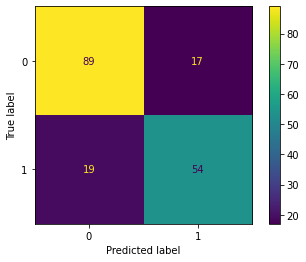

In [ ]:
#confusionmatrix
plot_confusion_matrix(logreg, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


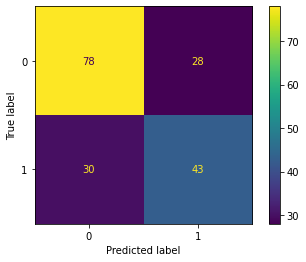

In [ ]:
plot_confusion_matrix(sgd, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


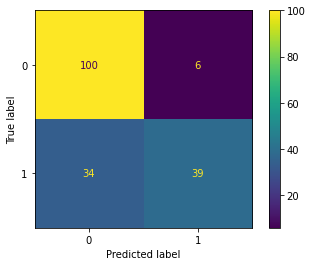

In [ ]:
plot_confusion_matrix(svc, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


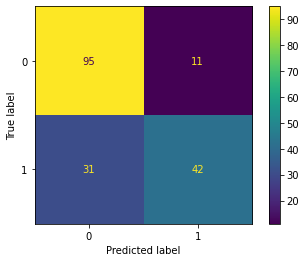

In [ ]:
plot_confusion_matrix(knn, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


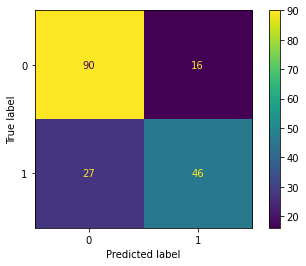

In [ ]:
plot_confusion_matrix(dtc, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


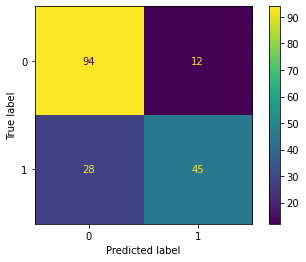

In [ ]:
plot_confusion_matrix(rfc, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


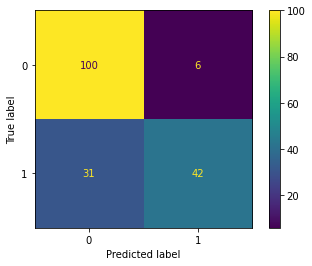

In [ ]:
plot_confusion_matrix(gbc, X_test, y_test)

Note: Logistic Regression and RandomForest seem to be performing better from test scores and f1 scores. So we will be tuning these models. 

##4. Improving shortlisted models

###4.1 Crossvalidation- GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

### 4.2 RandomizedSearchCV

In [ ]:
#defining the parameters
param = { 'n_neighbors': [3,5,7,9,11,13,15,17,19,21], 
         'weights':['uniform', 'distance'], 
         'metric': ['euclidean', 'manhattan', 'minkowski']}

In [ ]:
#importing crossvalidation libraries
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rscv = RandomizedSearchCV(knn, param, n_iter = 6, cv= 3)

In [ ]:
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=6,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [3, 5, 7, 9, 11, 13, 15,
                                                        17, 19, 21],
                                        'weights': ['uniform', 'distance']})

In [ ]:
rscv.best_score_

0.8244572090439551

In [ ]:
rscv.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=11)